## Домашнее задание 3 (10 баллов)

## Литасов Александр БЭК213

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [490]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [491]:
# your code here
df = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [492]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [493]:
df.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [494]:
df.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [495]:
df.isnull().sum().sum() # 0 --> пропусков нет

0

In [496]:
quantitative = np.array(['duration', 'amount', 'age'])
binary = np.array(['telephone', 'foreign_worker', 'credit_risk'])
ordinal = np.array(['employment_duration', 
           'installment_rate', 'number_credits', 'present_residence', 'people_liable'])
categorial = np.array(['status', 'savings', 'credit_history', 'purpose', 'personal_status_sex', 
              'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'])

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [497]:
df.groupby('purpose').mean()['amount']

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [498]:
print('Процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)')
df[(df['housing'] == 'rent') & (df['age'] < 30)].shape[0] / df[df['age'] < 30].shape[0]

Процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)


0.6666666666666666

In [499]:
print('Процент клиентов старше 40 лет снимает жилье')
df[(df['housing'] == 'rent') & (df['age'] > 40)].shape[0] / df[df['age'] > 40].shape[0]

Процент клиентов старше 40 лет снимает жилье


0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [500]:
df.number_credits.unique() # бывает один кредит и больше

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [501]:
print('Число иностранцев (foreign_worker) с числом кредитов (number_credits) больше 3')
df[(df['number_credits'] != '1') & (df['number_credits'] != '2-3')
   & (df['foreign_worker'] == 'yes')].shape[0]


Число иностранцев (foreign_worker) с числом кредитов (number_credits) больше 3


1

### Задание 6 (1 балл)

In [502]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

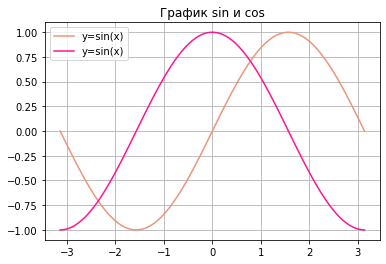

In [513]:
ax = plt.subplot() 
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
z = np.cos(x)

first = ax.plot(x, y, label='y=sin(x)', color='#E9967A')
second = ax.plot(x, z, label='y=sin(x)', color='#FF1493')

plt.title('График sin и cos') 

ax.legend()
ax.grid()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

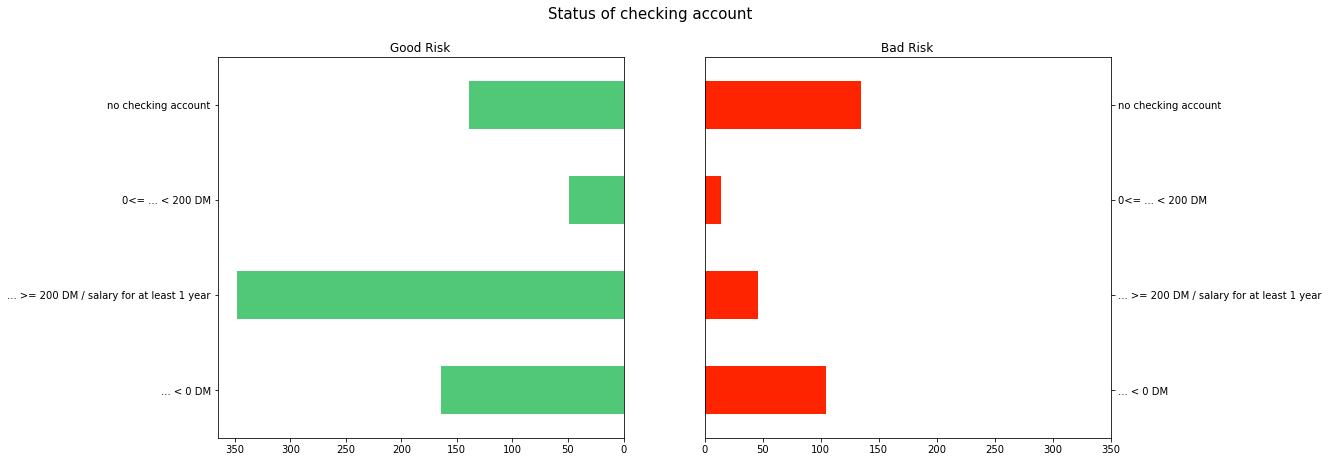

In [514]:
risk_good = df[df['credit_risk'] == 'good'][['credit_risk', 'status']].groupby(['status']).count()
risk_bad = df[df['credit_risk'] == 'bad'][['credit_risk', 'status']].groupby(['status']).count()

fig, (green, red) = plt.subplots(1, 2, figsize = (16,7))
fig.suptitle('Status of checking account', fontsize = 15)
risk_good.plot(kind = 'barh', ax = green, title='Good Risk', legend=None, xlabel='',color='#50C878').invert_xaxis()
risk_bad.plot(kind = 'barh', ax = red, title='Bad Risk', xticks=range(0, 400, 50), color='#FF2400', legend=None, xlabel='')
red.yaxis.tick_right()

plt.show()

---- 
#####  Из диаграмм видно, что по каждой категории значения у 'Good risk' выше

### Задание 8  (0.5 балла)

In [515]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

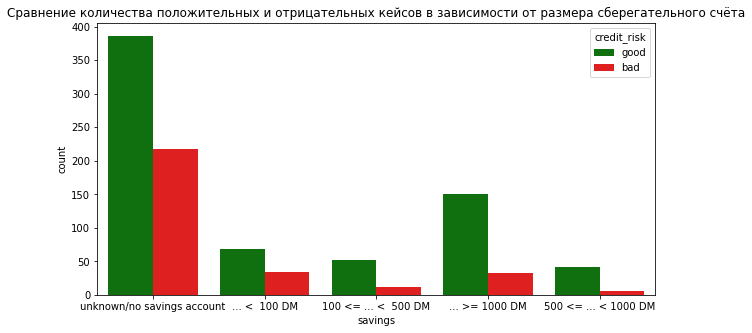

In [516]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x= "savings", hue= "credit_risk", palette=['green', 'red'])

plt.title('Cравнение количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')
plt.show()

---- 
#### Пострение графиков через seaborn явно приятнее и визуально понятнее. Вывод по графику тот же

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

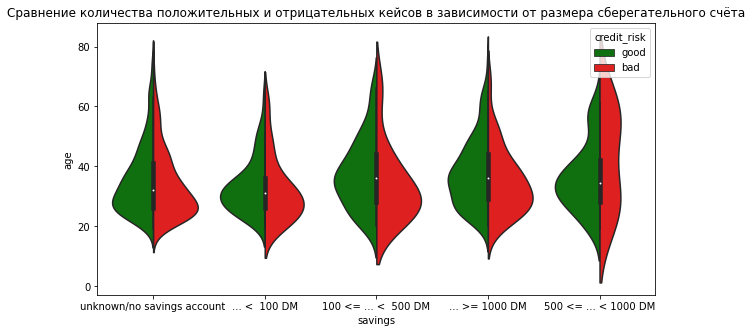

In [517]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=df, x= 'savings', y = 'age', hue= 'credit_risk', split = True, palette=['green', 'red'])

plt.title('Cравнение количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')
plt.show()

---- 
#####  Данная диаграмма позволяет дополнительно включить бинальный фактор credit_risk в рассмотрение

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

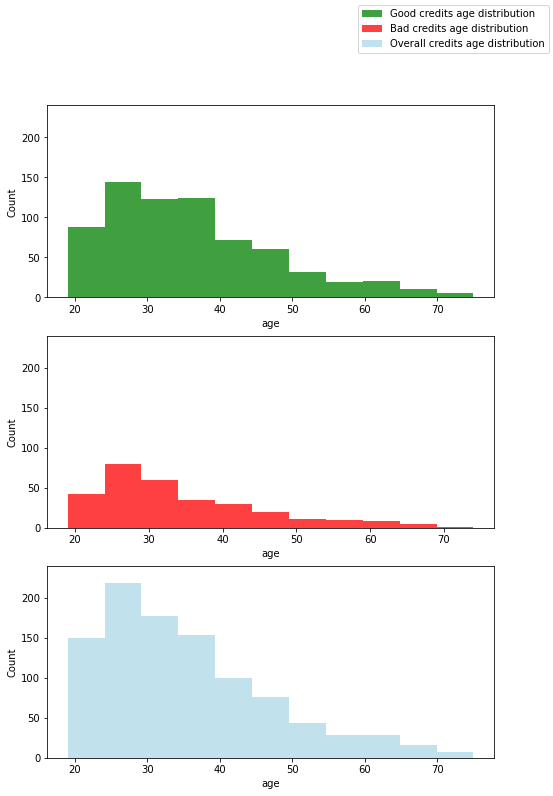

In [520]:
fig = plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
sns.histplot(df[df['credit_risk'] == 'good']['age'], label = 'Good credits age distribution', bins = 11, edgecolor = None,  color = 'green').set_ylim(0, 240)

plt.subplot(3, 1, 2)
sns.histplot(df[df['credit_risk'] == 'bad']['age'],label = 'Bad credits age distribution', bins = 11, edgecolor = None,  color = 'red').set_ylim(0, 240)

plt.subplot(3, 1, 3)
sns.histplot(df['age'], label = 'Overall credits age distribution', bins = 11, edgecolor = None,  color = 'lightblue').set_ylim(0, 240)
fig.legend()
plt.show()

---- 
##### Распределения в целом похожи на Пуассона с различиями в параметрах

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

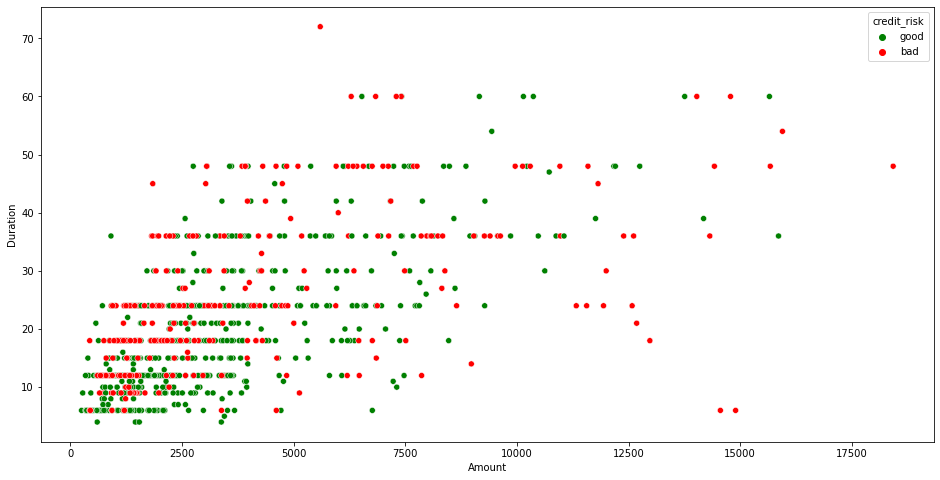

In [521]:
fig, graph = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = df, x="amount", y="duration", hue="credit_risk", palette= ['green', 'red'])
graph.set_xlabel('Amount')
graph.set_ylabel('Duration')
plt.show()

---- 
#####  Из диаграммы видно, что возвращаемые кредиты в большинстве выдаются на небоьшие суммы и до 10 лет. В свою очередь большое количество невозвращаемых кредитов начинает возникать при выдаче кредитов от 15 лет

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

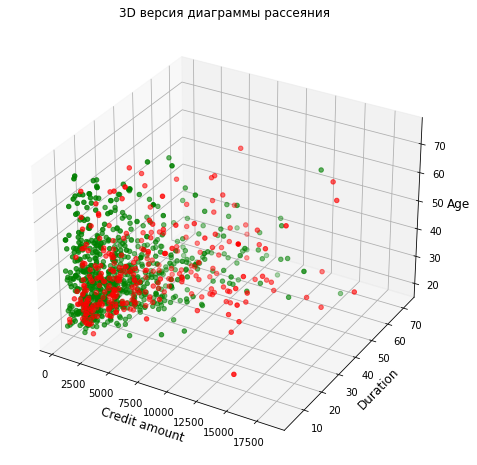

In [522]:
fig = plt.figure(figsize = (16,8))
kubik = fig.add_subplot(projection = '3d') 

x1 = df[df['credit_risk'] == 'good']['amount']
x2 = df[df['credit_risk'] == 'bad']['amount']
y1 = df[df['credit_risk'] == 'good']['duration']
y2 = df[df['credit_risk'] == 'bad']['duration']
z1 = df[df['credit_risk'] == 'good']['age']
z2 = df[df['credit_risk'] == 'bad']['age']

kubik.scatter(x1, y1, z1, color = 'green') 
kubik.scatter(x2, y2, z2, color = 'red') 

kubik.set_xlabel("Credit amount", fontsize = 12) 
kubik.set_ylabel("Duration", fontsize = 12) 
kubik.set_zlabel("Age", fontsize = 12) 

plt.title('3D версия диаграммы рассеяния')
plt.show()

---- 
#####  Данная диаграмма дополнительно позволяет посмотреть на возрастные распредления. Из диаграммы видно, что более старшие заемщики с большей верятностью вернут взятый кредит 

В целом выводы

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [524]:
df_numbers = df.copy()

columns_to_be_adjusted = np.concatenate((ordinal, binary), axis = 0)

for i in columns_to_be_adjusted:
    df_numbers[i] = pd.factorize(df_numbers[i])[0]

for i in categorial:
    df_numbers.drop([i], axis = 1, inplace = True)

In [525]:
df_numbers

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,0,0,0,21,0,0,0,0,0
1,9,2799,1,1,1,36,1,1,0,0,0
2,12,841,2,1,0,23,0,0,0,0,0
3,12,2122,1,2,1,39,1,1,0,1,0
4,12,2171,1,0,0,38,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1,1,0,21,0,1,0,0,1
996,24,2303,4,0,3,45,0,0,0,0,1
997,21,12680,4,0,0,30,0,0,1,0,1
998,12,6468,3,1,3,52,0,0,1,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [489]:
def predict(Xtest: np.array) -> np.array:
    results = []
    total_score = 0
    for i in Xtest:
        if i[0] < 10:
            total_score += 5
        if i[1] > 2000:
            total_score += 5
        if i[2] > 3:
            total_score += 5
        if i[3] == 1:
            total_score += 7
        if i[4] < 25:
            total_score += 5
        if i[5] > 1:
            total_score += 5 
        if total_score > 15:
            results.append('good')
        else:
            results.append('bad')
    return np.array(results)
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df_numbers.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/var/folders/8z/vdz_vf5x0td_rrfx9pj75j880000gn/T/ipykernel_21814/1003277683.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_numbers.drop('credit_risk', 1).values


0.66